In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from analysis_functions import Analysis

2023-06-13 22:46:01.580858: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-13 22:46:01.580892: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
results_path = "../../results/observables_uqc/uqc_2qubits_5layers_XX"

results = Analysis(results_path)

In [3]:
def flatten_gradients(gradients):
    for i in range(len(gradients)):
        for j in range(len(gradients[i])):
            gradients[i][j] = np.concatenate([lista.flatten() for lista in gradients[i][j]], axis = 0)


In [17]:
#gradients is a list of lists containing the gradients of each agent at every training step

gradients = results.get_gradients()

min_length = min([len(gradients[i]) for i in range(len(gradients))])

gradients = [gradients[i][:min_length] for i in range(len(gradients))]

flatten_gradients(gradients)

gradients_array = np.array(gradients)
print(gradients_array.shape)

magnitudes_gradients = np.linalg.norm(gradients_array, axis = 2)
print(magnitudes_gradients.shape)

mean_magnitudes_gradients = np.mean(magnitudes_gradients, axis = 0)
print(mean_magnitudes_gradients.shape)

std_magnitudes_gradients = np.std(magnitudes_gradients, axis = 0)
print(std_magnitudes_gradients.shape)

max_parameters_gradient = np.max(gradients_array, axis = 2)
max_parameters_gradient_index = np.argmax(gradients_array, axis = 2)

min_parameters_gradient = np.min(gradients_array, axis = 2)
min_parameters_gradient_index = np.argmin(gradients_array, axis = 2)

(5, 17447, 61)
(5, 17447)
(17447,)
(17447,)


(array([ 473.,  441., 1117.,  400.,  112.,  289., 1242.,  910.,   53.,
         357.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          38.,   36.,    0.,   46.,  105.,   31.,    0.,   37.,   87.,
          70.,    0.,   51.,    0.,  222.,  181.,    0.,  210.,   82.,
          75.,    0.,   36.,  108.,  205.,    0.,  788.,   42.,  100.,
           0.,   90.,   77.,   82.,    0.,   70.,    0.,    0., 1120.,
         455.,  667., 2767.,  569., 2291.,  897.,  418.]),
 array([ 0.        ,  0.96721311,  1.93442623,  2.90163934,  3.86885246,
         4.83606557,  5.80327869,  6.7704918 ,  7.73770492,  8.70491803,
         9.67213115, 10.63934426, 11.60655738, 12.57377049, 13.54098361,
        14.50819672, 15.47540984, 16.44262295, 17.40983607, 18.37704918,
        19.3442623 , 20.31147541, 21.27868852, 22.24590164, 23.21311475,
        24.18032787, 25.14754098, 26.1147541 , 27.08196721, 28.04918033,
        29.01639344, 29.98360656, 30.95081967, 31.91803279, 32.8852459 ,
    

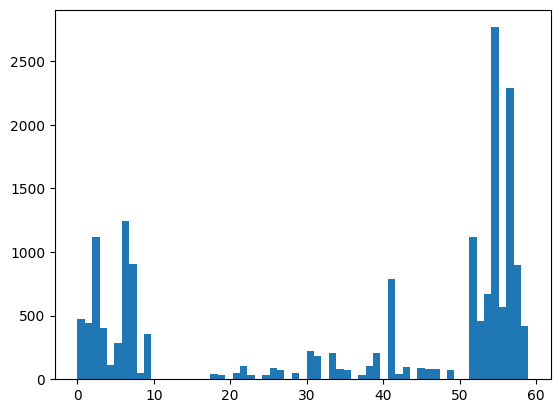

In [19]:
plt.hist(max_parameters_gradient_index[0], bins = 61)

It would be very cool if I could see to what type of parameters the maximum gradients belong to. To do that, I need to know what type of quantum circuit I have, the number of qubits and layers to find out to which type each index corresponds to.

For example, this data is for a UQC with 5 layers, 2 qubits and global skolik outscaling. Thus, the number of parameters is given by (4+1+1)*5*2 + 1 = 61 and the parameters are divided as follows:

 - First 10 parameters are the rotation parameters.
 - Next 40 parameters are the input encoding parameters.
 - Next 10 parameters are the biases.
 - Last parameter is the outscale parameter

In [38]:
max_parameters_gradient_index[0]

array([ 9,  9,  9, ...,  5, 57,  9])

(array([[5394., 2869., 9184.,    0.],
        [6558., 3227., 7662.,    0.],
        [7597., 2573., 7277.,    0.],
        [8054., 2726., 6667.,    0.],
        [6923., 2865., 7659.,    0.]]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5]),
 <a list of 5 BarContainer objects>)

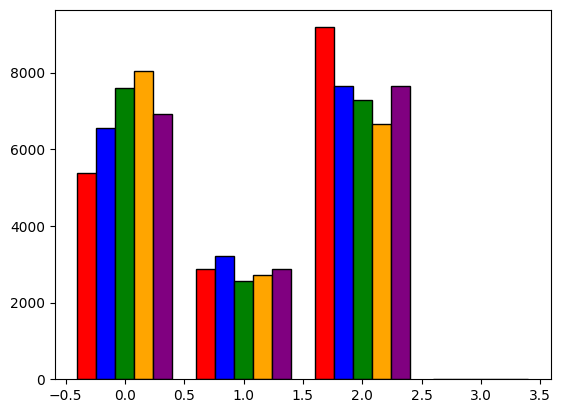

In [55]:
# Thus, if the index is between 0 and 9, the gradient is from the rotation parameters, if it is between 10 and 49, it is from the input encoding parameters,
# if it is between 50 and 59 it is a bias and if it is 60 it is the output encoding parameter. I want to group the gradients by type of parameter the max_parameters_gradient_index


def classify_gradient(list_of_indexes):
    new_list = []
    for i in range(len(list_of_indexes)):
        if list_of_indexes[i] < 10:
            new_list.append(0)
        elif list_of_indexes[i] < 50:
            new_list.append(1)
        elif list_of_indexes[i] < 60:
            new_list.append(2)
        else:
            new_list.append(3)
    return new_list

colors = ["red", "blue", "green", "orange", "purple"]
values = [classify_gradient(max_parameters_gradient_index[i]) for i in range(len(max_parameters_gradient_index))]

plt.hist(values, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], color = colors)

In [7]:
mean_gradients, std_gradients = results.calculate_mean_variance_gradients()

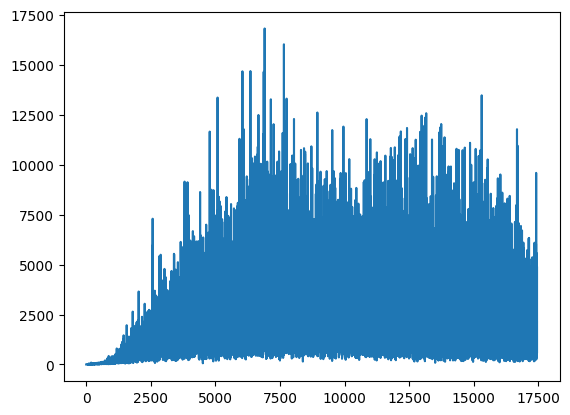

In [41]:
plt.plot(std_magnitudes_gradients)